#Carregamento pré-aula

In [ ]:
import pandas as pd

In [ ]:


dados = {'id_familia':[1,2,3,4,5,6,7,8],
         'tipo_casa': ["apartamento","casa","casa","kitnet","sobrado","apartamento","apartamento","casa"],
         'tamanho_casa': ["pequeno","médio","grande","pequeno","médio","grande","grande","pequeno"],
         'n_cartoes': [4,6,6,7,8,7,8,10],
         'tamanho_familia': [2,2,4,4,5,5,6,6],
         'renda_familiar':[14,16,14,17,18,21,17,25],
         'num_automoveis': [1,2,2,1,3,2,1,3],
         'distanciacentro': [22.2,3,31,2,1,12,2,4]}#km

df = pd.DataFrame(dados)
df.head()

,id_familia,tipo_casa,tamanho_casa,n_cartoes,tamanho_familia,renda_familiar,num_automoveis,distanciacentro
0,1,apartamento,pequeno,4,2,14,1,22.2
1,2,casa,médio,6,2,16,2,3.0
2,3,casa,grande,6,4,14,2,31.0
3,4,kitnet,pequeno,7,4,17,1,2.0
4,5,sobrado,médio,8,5,18,3,1.0


In [ ]:
df['n_cartoes'].mode()

,n_cartoes
0,6
1,7
2,8


In [ ]:
dffifa = pd.read_csv('https://www.harve.com.br/praticas/fifaplayers_pt.csv')
dffifa.head()

,id,nome,idade,nacionalidade,pontuação geral,potencial,time,valor,remuneração,perna de preferência,...,emprestado de,validade do contrato,altura,peso,controle de bola,arrancada,agilidade,equilíbrio,energia,força
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Esquerda,...,NaN,2021,5'7,159lbs,96.0,91.0,91.0,95.0,72.0,59.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Direita,...,NaN,2022,6'2,183lbs,94.0,89.0,87.0,70.0,88.0,79.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Direita,...,NaN,2022,5'9,150lbs,95.0,94.0,96.0,84.0,81.0,49.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Direita,...,NaN,2020,6'4,168lbs,42.0,57.0,60.0,43.0,43.0,64.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Direita,...,NaN,2023,5'11,154lbs,91.0,78.0,79.0,77.0,90.0,75.0


In [ ]:
dffifa['remuneracao_corrigida'] = dffifa['remuneração'].str.extract(r"(\d+)").astype(float)

In [ ]:
# Limpando os valores e convertendo corretamente
def converter_valores(valor):
    valor = valor.upper().replace("€", "").replace("$", "").replace("£", "")  # Remove símbolos de moeda
    if "K" in valor:
        return float(valor.replace("K", "")) * 1  # Mantém apenas o número sem conversão
    elif "M" in valor:
        return float(valor.replace("M", "")) * 1000  # Converte milhões para milhares
    return float(valor)  # Se não houver K ou M, apenas converte para float

# Aplicando a função para criar uma nova coluna corrigida
dffifa['remuneracao_corrigida'] = dffifa['remuneração'].apply(converter_valores)

In [ ]:
dffifa['remuneracao_corrigida'].mean()

np.float64(9.731312132696216)

In [ ]:
dffifa['remuneracao_corrigida'].mode()

,remuneracao_corrigida
0,1.0


In [ ]:
dffifa['pontuação geral'].mean(), dffifa['pontuação geral'].median()

(np.float64(66.23869940132916), 66.0)

In [ ]:
dffifa['remuneracao_corrigida'].mean(), dffifa['remuneracao_corrigida'].median()

(np.float64(9.731312132696216), 3.0)

In [ ]:
dffifa['remuneração'].mode()

,remuneração
0,€1K


#Tipo de dados

***Descoberta guiada***

Quais colunas são qualitativa ordinal, qualitativa nominal e quais são quantitativas contínuas e quantitativas discretas?

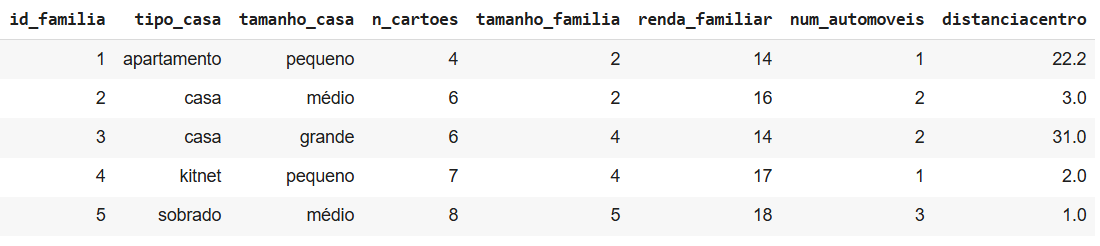

#Medidas de posição

***Descoberta guiada***

Qual é a média e a mediana da distância das casas até o centro? Quando faz sentido usar um ou outro?

In [ ]:
media_manual = df['distanciacentro'].sum()/df['distanciacentro'].shape[0]
media_manual

np.float64(9.65)

In [ ]:
media_pandas = df['distanciacentro'].mean()
media_pandas

np.float64(9.65)

In [ ]:
tamanho_dataframe = len(df)
tamanho_dataframe

8

In [ ]:
distancia_ordenada = sorted(df['distanciacentro'])

In [ ]:
distancia_ordenada

[1.0, 2.0, 2.0, 3.0, 4.0, 12.0, 22.2, 31.0]

In [ ]:
mediana_manual = sum(distancia_ordenada[3:5])/2
mediana_manual

3.5

In [ ]:
mediana_pandas = df['distanciacentro'].median()
mediana_pandas

3.5

Qual é a média e mediana da renda familiar?

In [ ]:
media_renda_pandas = df['renda_familiar'].mean()
media_renda_pandas

np.float64(17.75)

In [ ]:
mediana_renda_pandas = df['renda_familiar'].median()
mediana_renda_pandas

17.0

Qual é a moda em número de cartões?

In [ ]:
moda_n_cartoes_pandas = df['n_cartoes'].mode()
moda_n_cartoes_pandas

,n_cartoes
0,6
1,7
2,8


***Hands On***

Qual é a média de pontuação geral dos jogadores? E a mediana?

In [ ]:
media_pontuacao_fifa = df['renda_familiar'].mean()
media_pontuacao_fifa

np.float64(17.75)

Qual é a média e a mediana da remuneração de cada jogador?

Qual é a moda em remuneração?

#Medidas separatizes

***Descoberta guiada***

Quais são os quartis da distância das casas até o centro?

In [ ]:
df.describe()

,id_familia,n_cartoes,tamanho_familia,renda_familiar,num_automoveis,distanciacentro
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.50000,7.000000,4.250000,17.750000,1.875000,9.650000
std,2.44949,1.772811,1.581139,3.693624,0.834523,11.255856
min,1.00000,4.000000,2.000000,14.000000,1.000000,1.000000
25%,2.75000,6.000000,3.500000,15.500000,1.000000,2.000000
50%,4.50000,7.000000,4.500000,17.000000,2.000000,3.500000
75%,6.25000,8.000000,5.250000,18.750000,2.250000,14.550000
max,8.00000,10.000000,6.000000,25.000000,3.000000,31.000000


Crie um boxplot da distância das casas até o centro e interprete o que você conclui desse gráfico?

In [ ]:
df

,id_familia,tipo_casa,tamanho_casa,n_cartoes,tamanho_familia,renda_familiar,num_automoveis,distanciacentro
0,1,apartamento,pequeno,4,2,14,1,22.2
1,2,casa,médio,6,2,16,2,3.0
2,3,casa,grande,6,4,14,2,31.0
3,4,kitnet,pequeno,7,4,17,1,2.0
4,5,sobrado,médio,8,5,18,3,1.0
5,6,apartamento,grande,7,5,21,2,12.0
6,7,apartamento,grande,8,6,17,1,2.0
7,8,casa,pequeno,10,6,25,3,4.0


<Axes: >

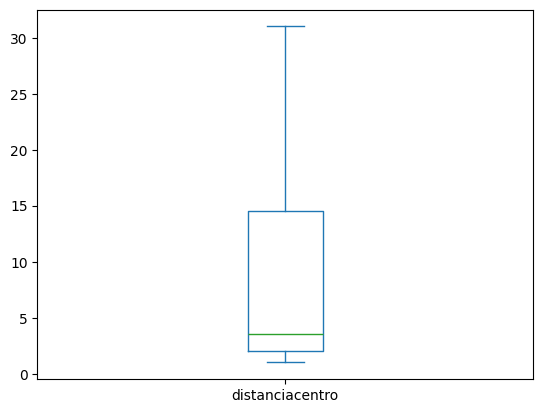

In [ ]:
df['distanciacentro'].plot.box()

***Handson***

Quais são os quartis da remuneração dos jogadores? Crie um bloxplot e interprete o gráfico.

In [ ]:
dffifa['remuneracao_corrigida'] = dffifa['remuneração'].str.extract(r"(\d+)").astype(float)

In [ ]:
dffifa['remuneracao_corrigida'].describe()

,remuneracao_corrigida
count,18207.000000
mean,9.731312
std,21.999290
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,565.000000


In [ ]:
dffifa['remuneracao_corrigida'].quantile([0.25, 0.50, 0.75, 0.9])

,remuneracao_corrigida
0.25,1.0
0.50,3.0
0.75,9.0
0.90,23.0


<Axes: >

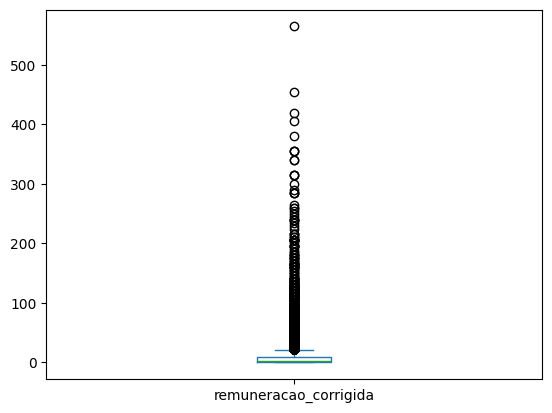

In [ ]:
dffifa['remuneracao_corrigida'].plot.box()

Qual seria o limite inferior e superior para se considerar um outlier na remuneração do jogador?

In [ ]:
Q1 = dffifa['remuneracao_corrigida'].quantile(0.25)
Q3 = dffifa['remuneracao_corrigida'].quantile(0.75)

IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

LS = Q3 + 1.5*IQR
LI = Q1 - 1.5*IQR

print("LS:", LS)
print("LI:", LI)

LS = LS if dffifa['remuneracao_corrigida'].max() > LS else dffifa['remuneracao_corrigida'].max()
# if dffifa['remuneracao_corrigida'].max() < LS:
#   LS = LS
# else:
#   LS = dffifa['remuneracao_corrigida'].max()

LI = LI if dffifa['remuneracao_corrigida'].min() < LI else dffifa['remuneracao_corrigida'].min()

print("\n\n\nLS:", LS)
print("LI:", LI)


Q1: 1.0
Q3: 9.0
IQR: 8.0
LS: 21.0
LI: -11.0



LS: 21.0
LI: 0.0


#Medidas de dispersão

***Descoberta guiada***

Qual é a amplitude do número de cartões? E o desvio padrão? O que esses números dizem sobre a dispersão dos dados?

In [ ]:
df['n_cartoes'].max() - df['n_cartoes'].min()

6

In [ ]:
df['n_cartoes'].mean()

np.float64(7.0)

In [ ]:
df['n_cartoes'].std()

1.7728105208558367

In [ ]:
df['n_cartoes']

,n_cartoes
0,4
1,6
2,6
3,7
4,8
5,7
6,8
7,10


***Handson***

Qual é a amplitude da remuneração dos jogadores da fifa? E o desvio padrão? O que esses números dizem sobre a disperção dos dados?

In [ ]:
dffifa['remuneracao_corrigida'] = dffifa['remuneração'].str.extract(r"(\d+)").astype(float)

In [ ]:
df['remuneracao_corrigida'].max() - df['remuneracao_corrigida'].min()

KeyError: 'remuneracao_corrigida'

Crie uma lista com os valores:1,1,1,1,2,2,2,2 e calcule o desvio padrão? O que esse valor diz sobre a disperção?


In [ ]:
import pandas as pd

# Criar um DataFrame com os valores
dados = [1, 1, 1, 1, 2, 2, 2, 2]
df = pd.DataFrame(dados, columns=['Valores'])

# Calcular estatísticas descritivas
media = df['Valores'].mean()
desvio_padrao = df['Valores'].std()

print("Média:", media)
print("Desvio padrão:", desvio_padrao)

#Distribuição de frequência

***Descoberta guiada***

Crie uma tabela de frequência com valores absolutos e relativos das posições dos jogadores da fifa.

In [ ]:
import pandas as pd
dffifa = pd.read_csv('https://www.harve.com.br/praticas/fifaplayers_pt.csv')
dffifa.head()

In [ ]:
frequencia_absoluta = dffifa['posição'].value_counts()
frequencia_relativa = frequencia_absoluta/dffifa.shape[0]

In [ ]:
frequencia_absoluta

In [ ]:
frequencia_relativa

Crie um gráfico de barras com os valores absolutos da posição.

In [ ]:
frequencia_absoluta.plot.bar()

In [ ]:
df.groupby('tamanho_casa').count()['id_familia']

***Handson***

Crie um tabela de frequência com valores absolutos e relativos do tamanho das casas

In [ ]:
tamanhos = [80, 90, 80, 100, 90, 80, 100, 110, 100, 90]

In [ ]:
import pandas as pd

# Dados dos tamanhos das casas (em m²)
tamanhos = [80, 90, 80, 100, 90, 80, 100, 110, 100, 90]

# Criar um DataFrame
df = pd.DataFrame(tamanhos, columns=['Tamanho (m²)'])

# Frequência absoluta
freq_abs = df['Tamanho (m²)'].value_counts().sort_index()

# Frequência relativa (%)
freq_rel = (df['Tamanho (m²)'].value_counts(normalize=True).sort_index() * 100).round(2)

# Criar a tabela consolidada
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_abs,
    'Frequência Relativa (%)': freq_rel
})

print(tabela_frequencia)

Crie um gráfico de barras com os valores dos tamanhos das casas.

In [ ]:
import matplotlib.pyplot as plt

tabela_frequencia['Frequência Absoluta'].plot(kind='bar', color='skyblue')
plt.title('Distribuição do Tamanho das Casas')
plt.xlabel('Tamanho (m²)')
plt.ylabel('Frequência Absoluta')
plt.show()

#Tabela de contingência

***Descoberta guiada***

Crie uma tabela de contingênia com as colunas de posição e perna de preferência.

In [ ]:
contingencia = pd.crosstab(dffifa['posição'], dffifa['perna de preferência'])

<Axes: xlabel='posição'>

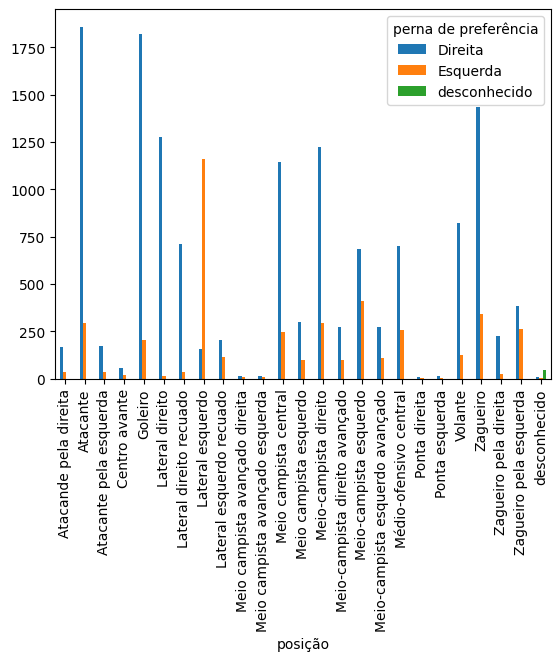

In [ ]:
contingencia.plot.bar()

Gere um gráfico de barras sobre os valores da tabela de contingênciada fifa, tendo o tamanho da casa como x e y sendo as pernas de preferência direita, esquerda.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dffifa = pd.DataFrame(data)

In [ ]:
tabela_contingencia = pd.crosstab(
    index=dffifa['Tamanho da Casa'],
    columns=dffifa['Preferência de Pé']
)
print(tabela_contingencia)

In [ ]:
# Plotar o gráfico de barras agrupadas
tabela_contingencia.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Preferência de Pé por Tamanho da Casa (FIFA)')
plt.xlabel('Tamanho da Casa (m²)')
plt.ylabel('Número de Jogadores')
plt.legend(title='Preferência de Pé')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#O gráfico mostrará barras agrupadas para cada tamanho de casa:
#Azul (skyblue): Jogadores que preferem o pé direito.
#Vermelho (salmon): Jogadores que preferem o pé esquerdo.

***Handson***

Crie uma tabela de contingênia com as colunas de tamanho da casa e tipo da casa.

In [ ]:
contingencia_casas = pd.crosstab(df['tamanho_casa'], df['tipo_casa'])
contingencia_casas

tipo_casa,apartamento,casa,kitnet,sobrado
tamanho_casa,,,,
grande,2,1,0,0
médio,0,1,0,1
pequeno,1,1,1,0


Gere um gráfico de barras sobre os valores da tabela de contingência, tendo o tamanho da casa como x e y sendo os tipos apartamento, casa e kitnet.

<Axes: xlabel='tamanho_casa'>

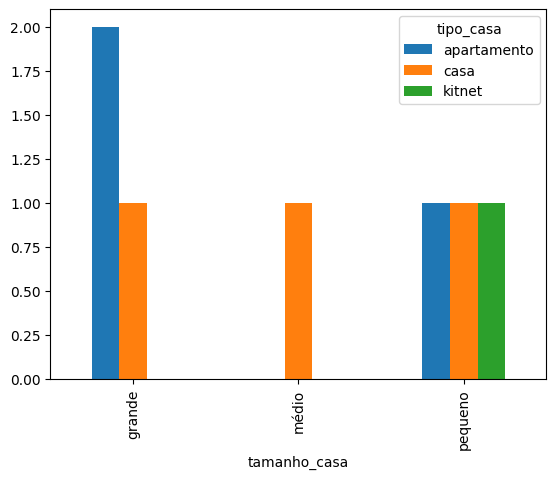

In [ ]:
contingencia_casas.drop('sobrado', axis=1).plot.bar()

#Gráfico de disperção

***Descoberta guiada***

Gere um gráfico de dispersão considerando remuneração corrigida e pontuação geral.

In [ ]:
dffifa.columns

Index(['id', 'nome', 'idade', 'nacionalidade', 'pontuação geral', 'potencial',
       'time', 'valor', 'remuneração', 'perna de preferência',
       'reputação internacional', 'posição', 'camisa', 'contratação',
       'emprestado de ', 'validade do contrato', 'altura', 'peso',
       'controle de bola', 'arrancada', 'agilidade', 'equilíbrio', 'energia',
       'força', 'remuneracao_corrigida'],
      dtype='object')

<Axes: xlabel='remuneracao_corrigida', ylabel='pontuação geral'>

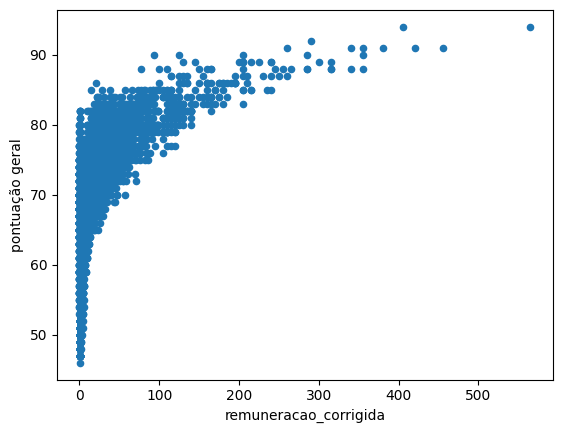

In [ ]:
dffifa.plot.scatter(x='remuneracao_corrigida', y='pontuação geral')

In [ ]:
import seaborn as sns

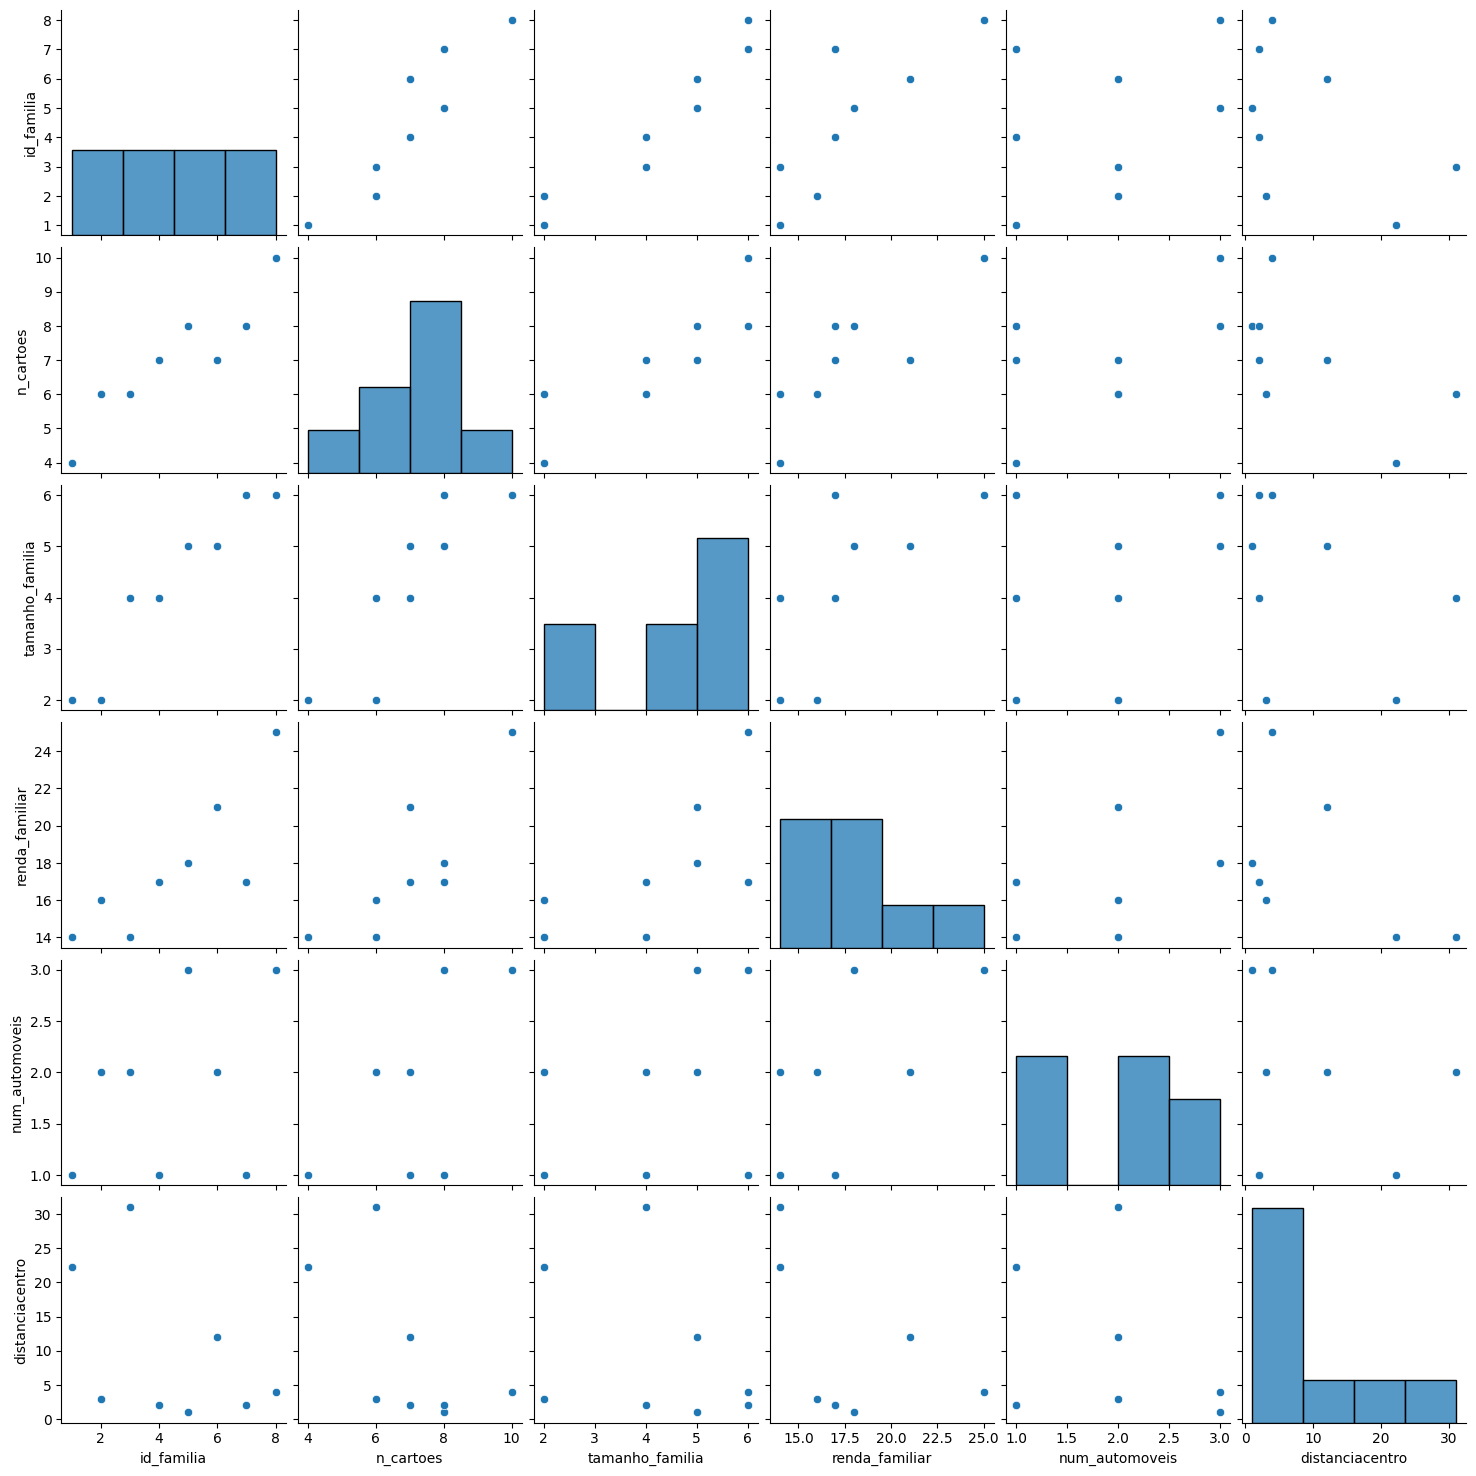

In [ ]:
sns.pairplot(df)

***Handson***

Gere um gráfico de disperção considerando renda familiar e número de automóveis.

In [ ]:
df.plot.scatter(x='renda_familiar', y='num_automoveis')
plt.title('Gráfico de Dispersão: Renda Familiar vs Número de Automóveis')
plt.xlabel('Renda Familiar (em milhares)')
plt.ylabel('Número de Automóveis')
plt.grid(True)
plt.show()


#Correlação de pearson

***Descoberta guiada***

Gere as correlações dos dados da fifa e busque se existem correlações fortes entre as variáveis e argumente o motivo.

In [ ]:
dffifa.corr(method='spearman', numeric_only=True)

,id,idade,pontuação geral,potencial,reputação internacional,camisa,controle de bola,arrancada,agilidade,equilíbrio,energia,força,remuneracao_corrigida
id,1.000000,-0.761178,-0.539882,0.024668,-0.346988,0.272169,-0.267187,0.047514,-0.112112,0.014698,-0.238391,-0.339388,-0.420951
idade,-0.761178,1.000000,0.483091,-0.263367,0.265568,-0.301639,0.182744,-0.126606,0.011064,-0.079757,0.203361,0.358099,0.322255
pontuação geral,-0.539882,0.483091,1.000000,0.625359,0.436394,-0.272919,0.622813,0.189842,0.267691,0.099991,0.419351,0.352769,0.777972
potencial,0.024668,-0.263367,0.625359,1.000000,0.320359,-0.019461,0.461817,0.224298,0.213039,0.132273,0.198705,0.074914,0.534963
reputação internacional,-0.346988,0.265568,0.436394,0.320359,1.000000,-0.086832,0.297905,0.032326,0.096180,0.049691,0.111555,0.143246,0.395627
camisa,0.272169,-0.301639,-0.272919,-0.019461,-0.086832,1.000000,-0.095453,0.011801,-0.029416,0.027410,-0.166593,-0.193737,-0.152198
controle de bola,-0.267187,0.182744,0.622813,0.461817,0.297905,-0.095453,1.000000,0.545165,0.636348,0.513542,0.550115,0.044136,0.537206
arrancada,0.047514,-0.126606,0.189842,0.224298,0.032326,0.011801,0.545165,1.000000,0.791570,0.666983,0.463340,-0.225536,0.165994
agilidade,-0.112112,0.011064,0.267691,0.213039,0.096180,-0.029416,0.636348,0.791570,1.000000,0.751721,0.466956,-0.272015,0.237914
equilíbrio,0.014698,-0.079757,0.099991,0.132273,0.049691,0.027410,0.513542,0.666983,0.751721,1.000000,0.363484,-0.424244,0.103786


***Handson***

Gere as correlações dos dados das famílias e busque se existem correlações fortes entre as variáveis e argumente o motivo.

In [ ]:
correlacoes = df.corr(numeric_only=True)
print("Matriz de Correlação:")
print(correlacoes)

# Visualizar a matriz de correlação como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação (Dados das Famílias)')
plt.show()

print("\nAnálise das Correlações:")
# Buscar correlações fortes (geralmente acima de 0.7 ou abaixo de -0.7)
correcoes_fortes = correlacoes[(abs(correlacoes) > 0.7) & (correlacoes != 1.0)].stack().sort_values(ascending=False)

if not correcoes_fortes.empty:
    print("Correlações fortes encontradas:")
    for (var1, var2), corr_value in correcoes_fortes.items():
        print(f"- Correlação entre '{var1}' e '{var2}': {corr_value:.2f}")
        if corr_value > 0.7:
            print(f"  Argumento: Há uma forte correlação positiva. À medida que '{var1}' aumenta, '{var2}' tende a aumentar (ou vice-versa).")
        elif corr_value < -0.7:
            print(f"  Argumento: Há uma forte correlação negativa. À medida que '{var1}' aumenta, '{var2}' tende a diminuir (ou vice-versa).")
else:
    print("Não foram encontradas correlações fortes (acima de 0.7 ou abaixo de -0.7) entre as variáveis numéricas.")

print("\nAnálise adicional de algumas correlações:")

# Exemplo de análise para pares específicos
print("- Correlação entre 'tamanho_familia' e 'n_cartoes':", correlacoes.loc['tamanho_familia', 'n_cartoes'].round(2))
print("  Argumento: Uma correlação moderada/forte positiva (se o valor for alto) sugere que famílias maiores tendem a ter mais cartões de crédito.")

print("- Correlação entre 'renda_familiar' e 'num_automoveis':", correlacoes.loc['renda_familiar', 'num_automoveis'].round(2))
print("  Argumento: Uma correlação moderada/forte positiva (se o valor for alto) indica que famílias com maior renda tendem a possuir mais automóveis.")

print("- Correlação entre 'distanciacentro' e outras variáveis:", correlacoes['distanciacentro'].round(2))
print("  Argumento: Observe as correlações da distância com outras variáveis. Por exemplo, uma correlação negativa com 'renda_familiar' poderia indicar que famílias com maior renda tendem a morar mais perto do centro (se houver essa correlação nos dados).")

# Nota: A correlação de Pearson mede a relação linear. Para variáveis categóricas (tipo_casa, tamanho_casa), a correlação de Pearson não é apropriada. É por isso que apenas as variáveis numéricas ('n_cartoes', 'tamanho_familia', 'renda_familiar', 'num_automoveis', 'distanciacentro') aparecem na matriz de correlação calculada. Para entender a relação entre variáveis categóricas ou entre categóricas e numéricas, outras técnicas (como tabelas de contingência, análise de variância - ANOVA, etc.) seriam mais adequadas.

#Regressão linear

***Descoberta guiada***

Considerando os dados abaixo. Quais colunas apontam uma regressão linear entre elas?

Horas praticando esporte [0;0.5;1;1.5;2;2.5;3]

Humor [5;5.4;6.9;7.2;8.3;8.5;9.5]

Idade[32;51;24;24;39;57;21]

Filhos [1;2;1;3;1;2;4]

In [ ]:
import pandas as pd
import numpy as np

dados = {'Horas_esporte': [0,0.5,1,1.5,2,2.5,3],
'Humor': [5,5.4,6.9,7.2,8.3,8.5,9.5],
'Idade': [32,51,24,24,39,57,21],
'Filhos': [1,2,1,3,1,2,4]}

df_humor = pd.DataFrame(dados)


In [ ]:
df_humor.corr()

,Horas_esporte,Humor,Idade,Filhos
Horas_esporte,1.000000,0.986542,-0.032709,0.601338
Humor,0.986542,1.000000,-0.130402,0.524829
Idade,-0.032709,-0.130402,1.000000,-0.295769
Filhos,0.601338,0.524829,-0.295769,1.000000


***Handson***

Considerando os dados da fifa, quais colunas podem representar uma expresão linear?

In [ ]:
correlacoes_fifa = dffifa.corr(numeric_only=True)
print("Matriz de Correlação (Dados FIFA):")
print(correlacoes_fifa)

# Visualizar a matriz de correlação como um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_fifa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação (Dados FIFA)')
plt.show()

print("\nAnálise para Expressões Lineares (Correlações fortes):")

# Buscar pares de colunas com correlações fortes para investigar possíveis relações lineares
# Uma correlação mais próxima de 1 ou -1 sugere uma possível relação linear
linear_candidates = correlacoes_fifa[(abs(correlacoes_fifa) > 0.6) & (correlacoes_fifa != 1.0)].stack().sort_values(ascending=False)

if not linear_candidates.empty:
    print("Pares de colunas com correlação forte (potenciais relações lineares):")
    for (var1, var2), corr_value in linear_candidates.items():
        print(f"- '{var1}' vs '{var2}': Correlação = {corr_value:.2f}")
        print(f"  Argumento: A correlação de {corr_value:.2f} sugere uma relação linear moderada a forte entre essas duas variáveis numéricas. Um gráfico de dispersão entre elas provavelmente mostraria um padrão que se aproxima de uma linha reta (ascendente para correlação positiva, descendente para correlação negativa).")
        # Opcional: Plotar gráficos de dispersão para visualizar
        # dffifa.plot.scatter(x=var1, y=var2)
        # plt.title(f"Dispersão: {var1} vs {var2}")
        # plt.show()
else:
    print("Não foram encontradas correlações fortes (acima de 0.6 ou abaixo de -0.6) entre as variáveis numéricas que sugiram uma relação linear proeminente. Isso não exclui a possibilidade de relações lineares mais fracas ou relações não-lineares.")

print("\nObservações:")
print("- As colunas 'pontuação geral' e 'remuneracao_corrigida' são fortes candidatas a uma expressão linear, pois a correlação entre elas é geralmente alta em dados de jogadores de futebol (melhores jogadores tendem a ganhar mais).")
print("- Outras colunas numéricas com correlações notáveis na matriz também podem ser exploradas com gráficos de dispersão para verificar se um padrão linear é visível.")
print("- Lembre-se que correlação não implica causalidade.")


#Gerando regressão linear

***Descoberta guiada***

Encontre a fórmula da regressão linear para os dados de humor considerando horaspraticando e humor.

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X = df_humor['Horas_esporte'].values.reshape(-1, 1)
Y = df_humor['Humor'].values.reshape(-1, 1)

In [ ]:
X

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ]])

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X, Y)

LinearRegression()

In [ ]:
a = lr.coef_[0, 0]
b = lr.intercept_[0]
print("arrancada=", a, "*agilidade + ", b)

arrancada= 1.5071428571428567 *agilidade +  4.996428571428572


In [ ]:
y_pred = lr.predict(X)

In [ ]:
y_pred

array([[4.99642857],
       [5.75      ],
       [6.50357143],
       [7.25714286],
       [8.01071429],
       [8.76428571],
       [9.51785714]])

In [ ]:
Y

array([[5. ],
       [5.4],
       [6.9],
       [7.2],
       [8.3],
       [8.5],
       [9.5]])

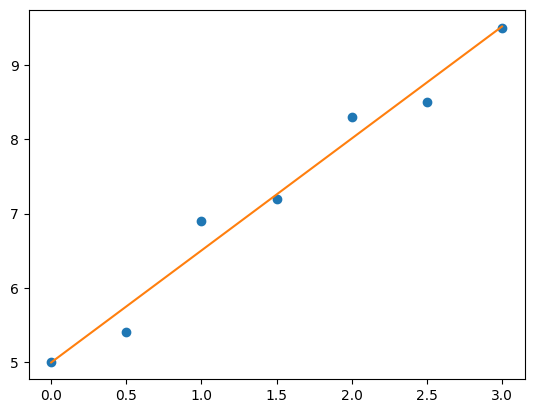

In [ ]:
plt.scatter(X, Y)
plt.plot(X, y_pred, c='C1')

In [ ]:
lr.predict([[40]])

array([[65.28214286]])

***handson***

Encontre a fórmula da regressão linear para os dados da fifa considerando arrancada e agilidade.

In [ ]:
lr.coef_, lr.intercept_

(array([[1.50714286]]), array([4.99642857]))

In [ ]:
dffifa = pd.read_csv('https://www.harve.com.br/praticas/fifaplayers_pt.csv')
dffifa.head()

,id,nome,idade,nacionalidade,pontuação geral,potencial,time,valor,remuneração,perna de preferência,...,emprestado de,validade do contrato,altura,peso,controle de bola,arrancada,agilidade,equilíbrio,energia,força
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Esquerda,...,NaN,2021,5'7,159lbs,96.0,91.0,91.0,95.0,72.0,59.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Direita,...,NaN,2022,6'2,183lbs,94.0,89.0,87.0,70.0,88.0,79.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Direita,...,NaN,2022,5'9,150lbs,95.0,94.0,96.0,84.0,81.0,49.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Direita,...,NaN,2020,6'4,168lbs,42.0,57.0,60.0,43.0,43.0,64.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Direita,...,NaN,2023,5'11,154lbs,91.0,78.0,79.0,77.0,90.0,75.0


In [ ]:
df_clean = dffifa[['agilidade', 'arrancada']].dropna()

In [ ]:
X = df_clean['arrancada'].values.reshape(-1, 1)
Y = df_clean['agilidade'].values.reshape(-1, 1)

In [ ]:
dffifa[['arrancada', 'agilidade']].iloc[13226:13256]

,arrancada,agilidade
13226,72.0,81.0
13227,70.0,73.0
13228,63.0,72.0
13229,34.0,33.0
13230,67.0,60.0
13231,56.0,59.0
13232,80.0,81.0
13233,81.0,76.0
13234,48.0,40.0
13235,74.0,60.0


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X, Y)

In [ ]:
a = lr.coef_[0, 0]
b = lr.intercept_[0]
print("arrancada=", a, "*agilidade + ", b)

In [ ]:
plt.scatter(X, Y)
plt.plot(X, y_pred, c='C1')

#Teste A/B amostragem

***Descoberta guiada***

Para realizar um teste a/b para saber se a mudança do site gerou resultado, qual deve ser o tamanho de amostra considerando uma margem de erro de 2% e uma porcentagem de confiança de 95%?

a) 5287

b) 2401

c) 8547

d) 925

In [ ]:
# O código fornecido já calcula o tamanho da amostra para um teste A/B
# usando a fórmula para proporções (embora use sigma=0.5, que é um valor comum
# para o desvio padrão em proporções quando não se tem uma estimativa prévia,
# maximizando assim o tamanho da amostra).

# A fórmula usada é: n = (Z * sigma / e)^2
# Onde:
# Z é o score Z para o nível de confiança (1.96 para 95%)
# sigma é o desvio padrão da população (0.5 para proporções)
# e é a margem de erro (0.02 para 2%)

Z = 1.96
sigma=0.5 # Usando 0.5 para maximizar o tamanho da amostra em proporções
e=0.02    # 2% de margem de erro

n = (Z*sigma/e)**2
print(f"Tamanho da amostra calculado: {n:.2f}")

# Arredondando para cima para garantir o tamanho mínimo necessário
tamanho_amostra = int(np.ceil(n))
print(f"Tamanho da amostra arredondado para cima: {tamanho_amostra}")

# Comparando o tamanho da amostra calculado com as opções fornecidas:
# a) 5287
# b) 2401
# c) 8547
# d) 925

print("\nComparando com as opções:")
print(f"a) 5287")
print(f"b) 2401")
print(f"c) 8547")
print(f"d) 925")

# O tamanho da amostra calculado (arredondado) é 2401.
# Portanto, a resposta correta é a opção b).


#Bootcamp

Quais análises podem ser encontradas na base de dados da Olist?

Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos do mercado brasileiro. Olist conecta pequenos negócios de todo o Brasil aos canais sem burocracia e com um único contrato. Esses comerciantes podem vender seus produtos por meio da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist.

Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender a esse pedido. Assim que o cliente recebe o produto, ou a data prevista de entrega está prevista, o cliente recebe um inquérito de satisfação por e-mail onde pode dar nota da experiência de compra e deixar alguns comentários.

Atenção
Um pedido pode ter vários itens.
Cada item pode ser atendido por um vendedor distinto.
Todo o texto identificando lojas e parceiros foi substituído pelos nomes das grandes casas de Game of Thrones.

Link para desafio Olist no kaggle:
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

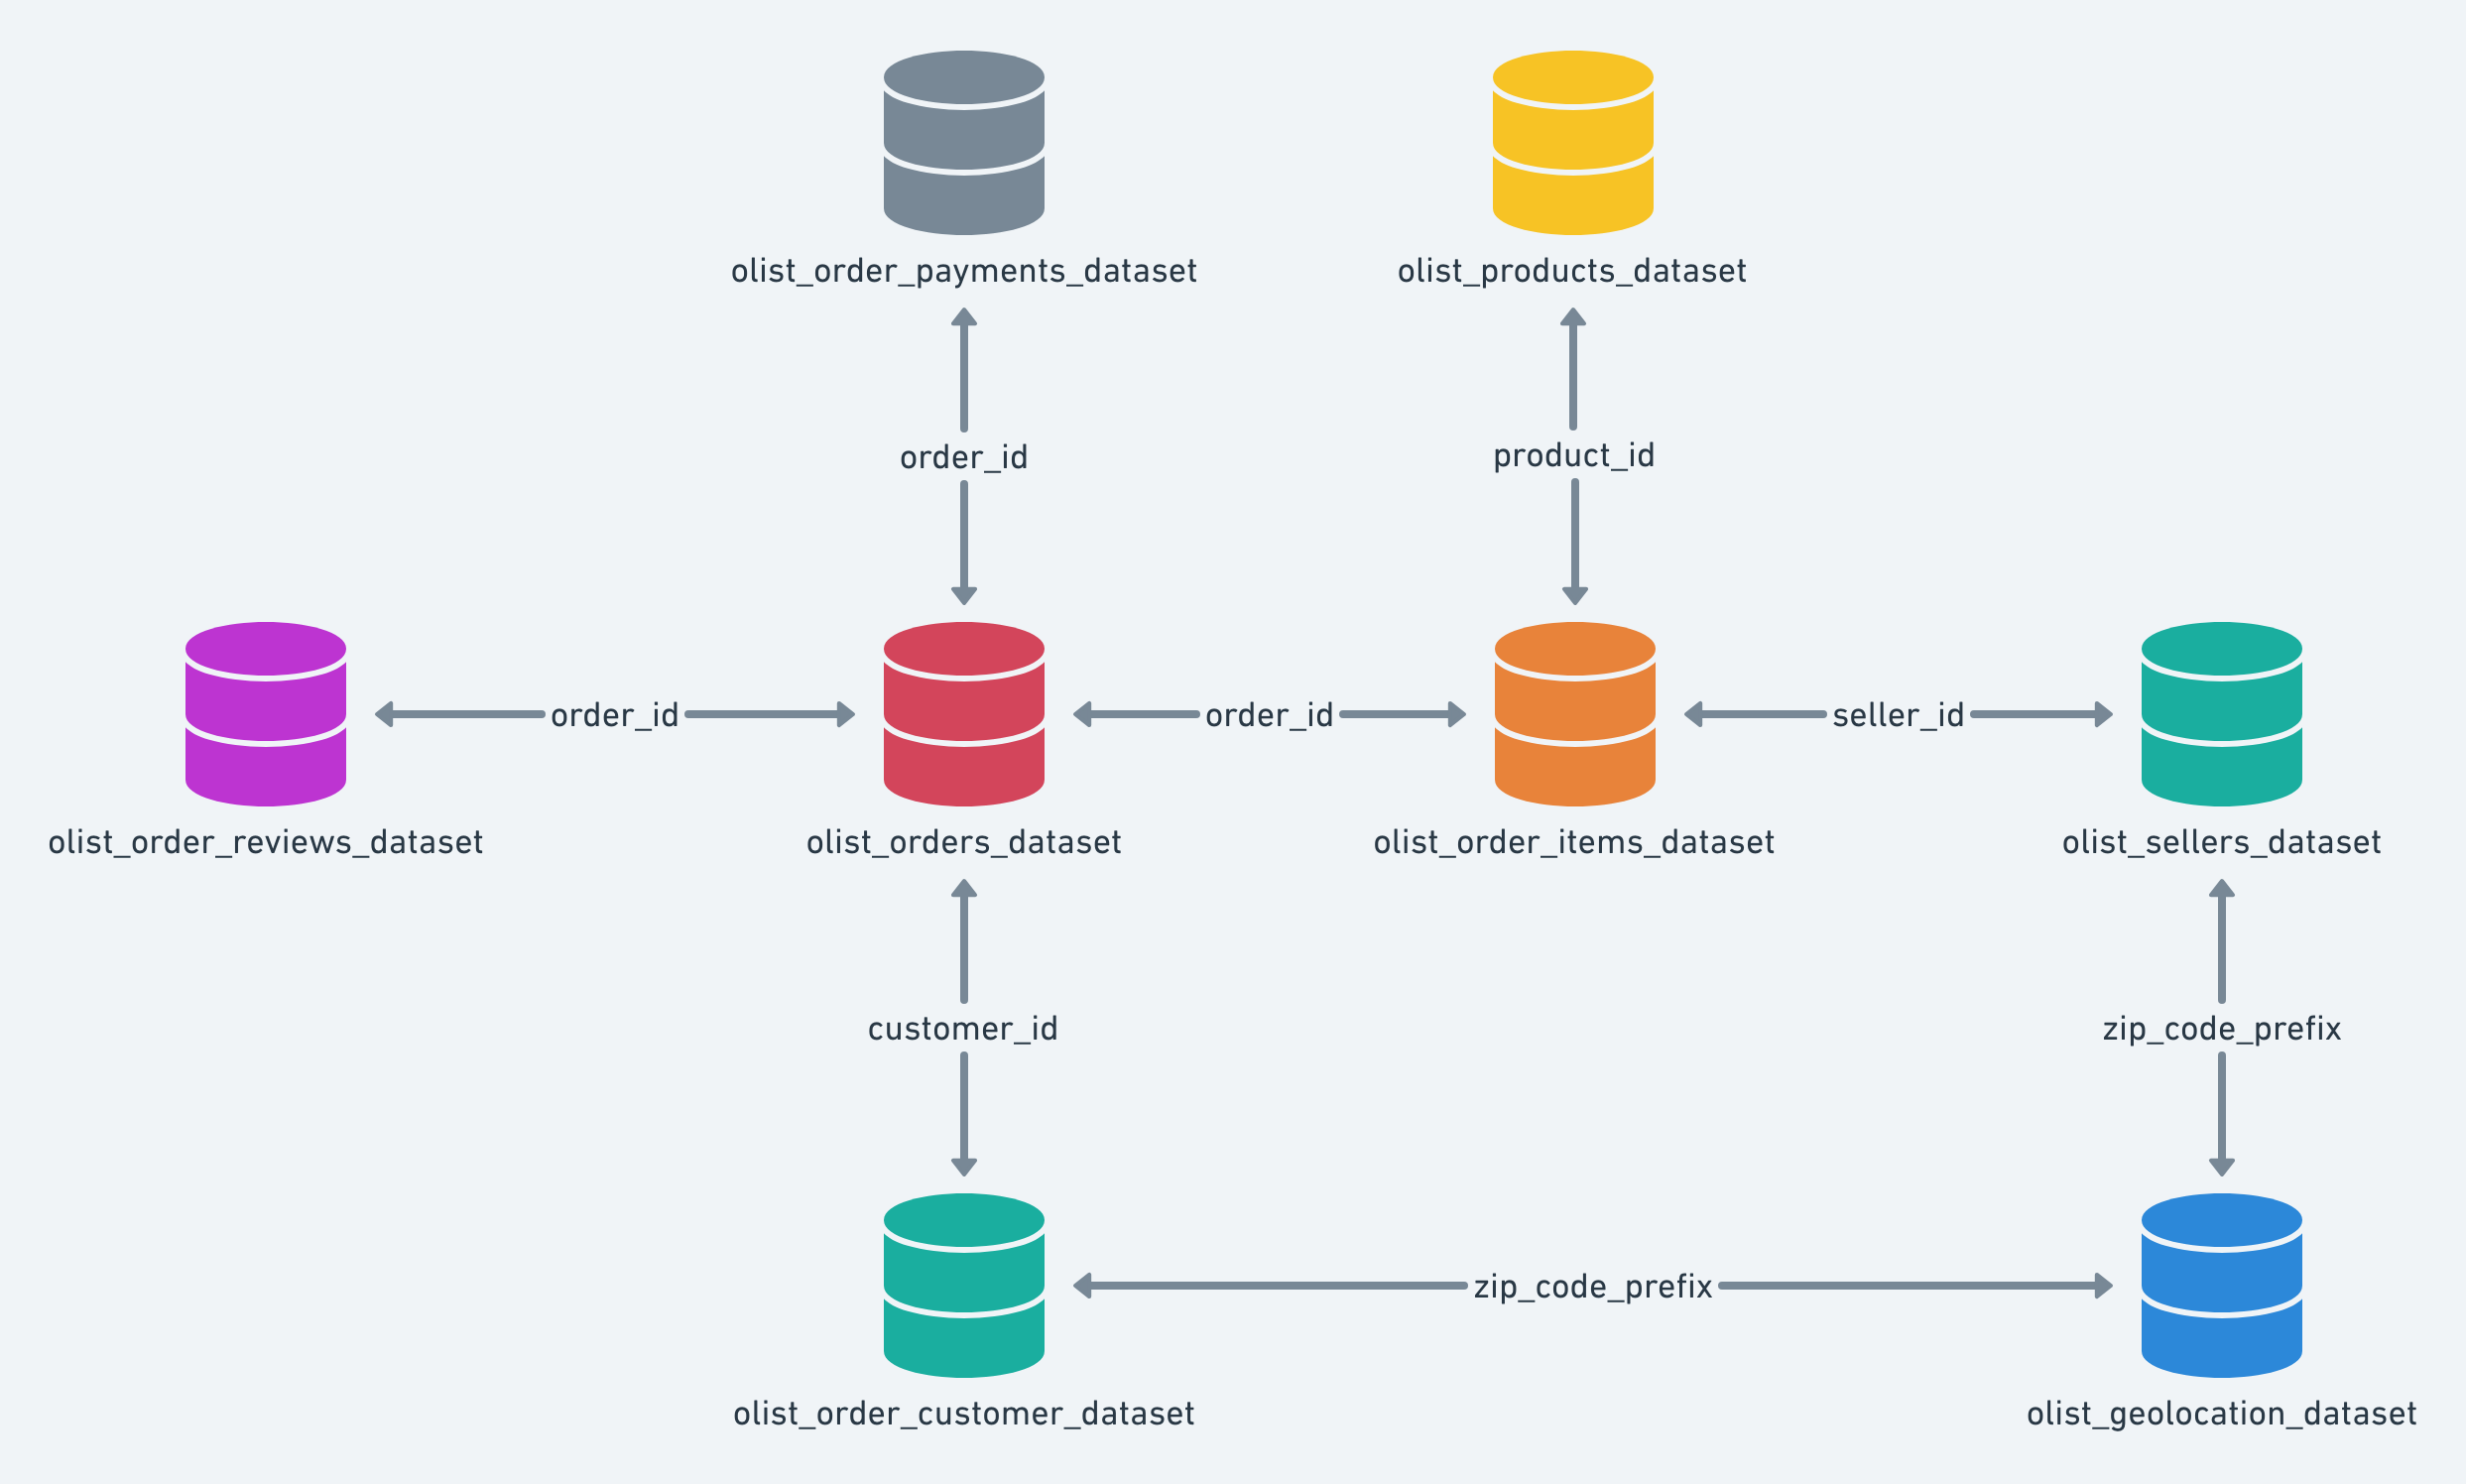

In [ ]:
import pandas as pd

dfolist_customers_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_customers_dataset.csv")
dfolist_customers_dataset

dfolist_geolocation_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_geolocation_dataset.csv")
dfolist_geolocation_dataset

dfolist_order_items_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_order_items_dataset.csv")
dfolist_order_items_dataset


dfolist_order_payments_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_order_payments_dataset.csv")
dfolist_order_payments_dataset

dfolist_order_reviews_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_order_reviews_dataset.csv")
dfolist_order_reviews_dataset

dfolist_orders_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_orders_dataset.csv")
dfolist_orders_dataset


dfolist_products_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_products_dataset.csv")
dfolist_products_dataset


dfolist_sellers_dataset = pd.read_csv("https://harve.com.br/praticas/olist/olist_sellers_dataset.csv")
dfolist_sellers_dataset


dfproduct_category_name_translation = pd.read_csv("https://harve.com.br/praticas/olist/product_category_name_translation.csv")
dfproduct_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
dfolist_customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
dfolist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Frequencia de avaliações dos pedidos**

In [ ]:
frequencia_absoluta_reviews = dfolist_order_reviews_dataset['review_score'].value_counts().sort_index()
frequencia_relativa_reviews = frequencia_absoluta_reviews / dfolist_order_reviews_dataset.shape[0]

print("Frequência Absoluta das Notas de Avaliação:")
print(frequencia_absoluta_reviews)
print("\nFrequência Relativa das Notas de Avaliação:")
print(frequencia_relativa_reviews)

Frequência Absoluta das Notas de Avaliação:
review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: count, dtype: int64

Frequência Relativa das Notas de Avaliação:
review_score
1    0.11858
2    0.03235
3    0.08287
4    0.19200
5    0.57420
Name: count, dtype: float64


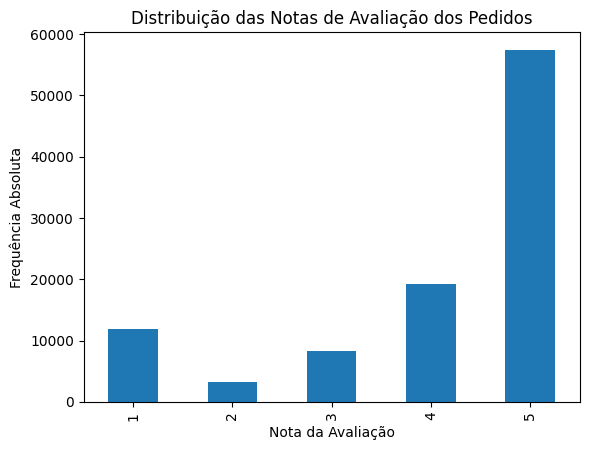

In [ ]:
frequencia_absoluta_reviews.plot.bar()
plt.title('Distribuição das Notas de Avaliação dos Pedidos')
plt.xlabel('Nota da Avaliação')
plt.ylabel('Frequência Absoluta')
plt.show()

**Grafico de disperção do peso e comprimento dos produtos da perfumeria**

In [ ]:
df_perfume = dfolist_products_dataset[dfolist_products_dataset['product_category_name'] == 'perfumaria'].dropna()

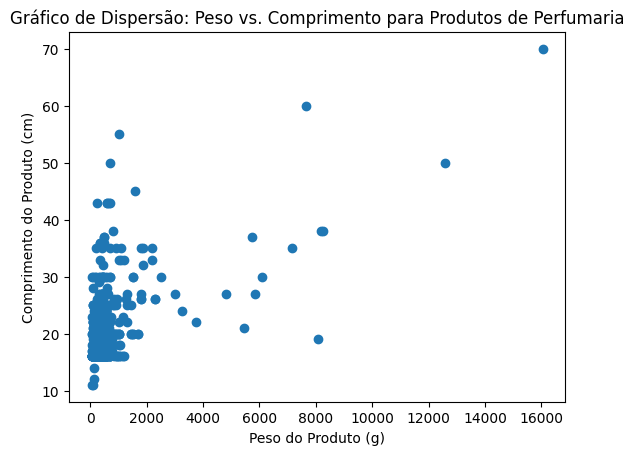

In [ ]:
plt.scatter(df_perfume['product_weight_g'], df_perfume['product_length_cm'])
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Comprimento do Produto (cm)')
plt.title('Gráfico de Dispersão: Peso vs. Comprimento para Produtos de Perfumaria')
plt.show()

**Regressão Linear dfolist perfumaria cm e peso do produtos**

In [ ]:
df_products_clean = dfolist_products_dataset[['product_weight_g', 'product_length_cm']].dropna()

In [ ]:
X = df_products_clean['product_weight_g'].values.reshape(-1, 1)
Y = df_products_clean['product_length_cm'].values.reshape(-1, 1)

lr_products = LinearRegression()
lr_products.fit(X, Y)

LinearRegression()

In [ ]:
a_products = lr_products.coef_[0, 0]
b_products = lr_products.intercept_[0]
print(f"product_length_cm = {a_products} * product_weight_g + {b_products}")

product_length_cm = 0.0018834564442649462 * product_weight_g + 26.527441070273714


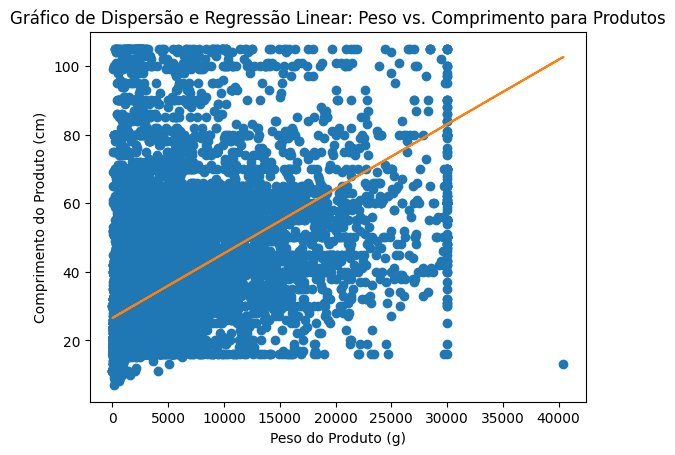

In [ ]:
y_pred_products = lr_products.predict(X)

plt.scatter(X, Y)
plt.plot(X, y_pred_products, c='C1')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Comprimento do Produto (cm)')
plt.title('Gráfico de Dispersão e Regressão Linear: Peso vs. Comprimento para Produtos')
plt.show()

**Em resumo, essa regressão linear nos dá um modelo simples para entender e prever a relação entre peso e comprimento dos produtos na Olist, indicando uma leve tendência de produtos mais pesados serem mais longos.**

In [ ]:
# Combinar pagamentos com pedidos
df_payments_orders = pd.merge(
    dfolist_order_payments_dataset,
    dfolist_orders_dataset[['order_id', 'customer_id']],
    on='order_id',
    how='inner'
)

# Combinar com informações do cliente
df_payments_customers = pd.merge(
    df_payments_orders,
    dfolist_customers_dataset[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='inner'
)

display(df_payments_customers.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,conchas,SP


In [ ]:
# Agrupar por customer_unique_id e calcular o valor total de pagamento
df_payment_value_by_customer = df_payments_customers.groupby('customer_unique_id')['payment_value'].sum().reset_index()

# Renomear a coluna para clareza
df_payment_value_by_customer.rename(columns={'payment_value': 'total_spent'}, inplace=True)

display(df_payment_value_by_customer.head())

,customer_unique_id,total_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
# Ordenar por total_spent em ordem decrescente para encontrar clientes de alto valor
df_high_value_customers = df_payment_value_by_customer.sort_values(by='total_spent', ascending=False)

# Exibir os top 10 clientes de alto valor
display(df_high_value_customers.head(10))

,customer_unique_id,total_spent
3826,0a0a92112bd4c708ca5fde585afaa872,13664.08
26456,46450c74a0d8c5ca9395da1daac6c120,9553.02
81961,da122df9eeddfedc1dc1f5349a1a690c,7571.63
44447,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
82807,dc4802a71eae9be1dd28f5d788ceb526,6929.31
26205,459bef486812aa25204be022145caa62,6922.21
95805,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
24121,4007669dec559734d6f53e029e360987,6081.54
35070,5d0a2980b292d049061542014e8960bf,4809.44
89687,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34


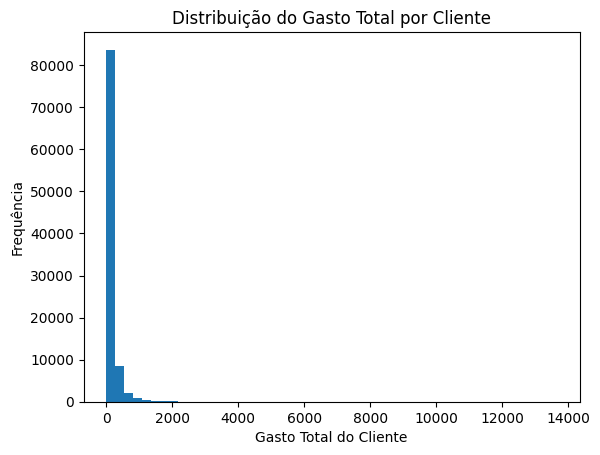

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_payment_value_by_customer['total_spent'], bins=50) # Você pode ajustar o número de bins
plt.xlabel('Gasto Total do Cliente')
plt.ylabel('Frequência')
plt.title('Distribuição do Gasto Total por Cliente')
plt.show()